In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from imblearn import under_sampling, over_sampling
import gc
from sklearn import impute

# Récupération des données

In [2]:
X = pd.read_csv("data/train_df.csv", index_col="SK_ID_CURR")
cat_features = pickle.load(open("data/pickle_cat_features.pkl", "rb"))
y = X["TARGET"]
X.drop(columns=["index", "TARGET"], inplace=True)
X = X.replace(to_replace=np.nan, value=0)

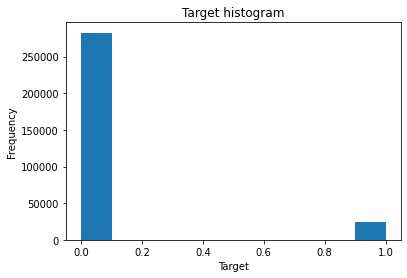

In [3]:
# distribution de la cible

y.value_counts()
y.plot.hist(title="Target histogram")
plt.xlabel("Target");

# Réduction de la classe majoritaire

In [4]:
renn = under_sampling.RepeatedEditedNearestNeighbours()
X_resampled, y_resampled = renn.fit_resample(X, y)
del X,y
gc.collect()

3271

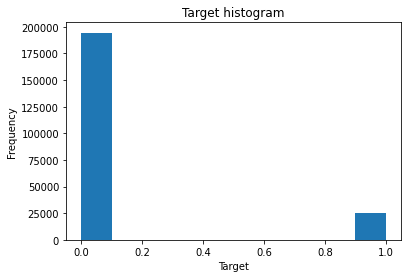

In [5]:
print(y_resampled.value_counts())
y_resampled.plot.hist(title="Target histogram")
plt.xlabel("Target");

In [6]:
X_resampled.to_csv("data/X_resampled.csv")
y_resampled.to_csv("data/y_resampled.csv")

# Augmentation de la classe minoritaire

In [7]:
smote_nc = over_sampling.SMOTENC(categorical_features=list(np.where(X_resampled.columns.isin(cat_features))[0]), 
                                 random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X_resampled, y_resampled)

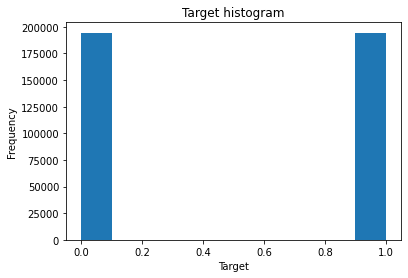

In [8]:
print(y_resampled.value_counts())
y_resampled.plot.hist(title="Target histogram")
plt.xlabel("Target");

In [9]:
X_resampled.to_csv("data/X_resampled.csv")
y_resampled.to_csv("data/y_resampled.csv")

# Enregistrement des données

In [10]:
X_resampled["TARGET"] = y_resampled
X_resampled.to_csv("data/train_resampled.csv")
